In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Load Data

In [2]:
DATA_DIR = '../../data/raw/small/'
test_data = pd.read_csv(DATA_DIR + 'test.csv')
train_data = pd.read_csv(DATA_DIR + 'train.csv')

## Generate x and y data

In [3]:
TARGET_COL_NAME = 'phishing'
y_train = train_data[TARGET_COL_NAME]
y_test = test_data[TARGET_COL_NAME]
x_train = train_data.drop(TARGET_COL_NAME, axis = 1)
x_test = test_data.drop(TARGET_COL_NAME, axis = 1)

## Train the model using training data

In [4]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## Save the model

In [5]:
from joblib import dump, load
dump(tree_model, "../../models/decision_tree_small_model.pkl") 

['../../models/decision_tree_small_model.pkl']

## Evaluate the model based on max_depth

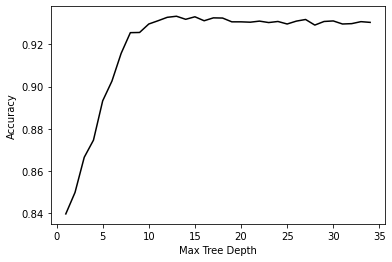

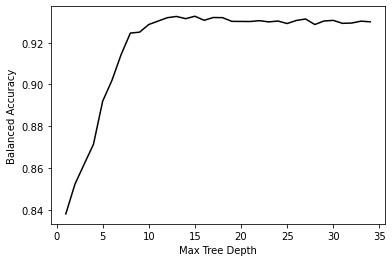

<function matplotlib.pyplot.show(close=None, block=None)>

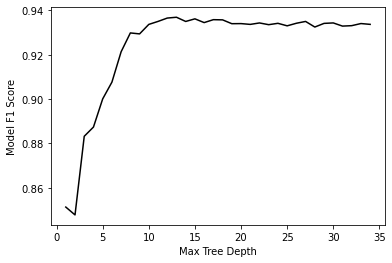

In [6]:
accuracy = []
bal_accuracy = []
f1_score_test = []
max_depth = np.arange(35)[1:]
for i in max_depth:         
    tree = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    bal_accuracy.append(balanced_accuracy_score(y_test, y_pred))
    f1_score_test.append(f1_score(y_test, y_pred))
    
plt.plot(max_depth, accuracy, color = 'black', label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max Tree Depth')
plt.show()
plt.plot(max_depth, bal_accuracy, color = 'black', label='Balanced Accuracy')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Max Tree Depth')
plt.show()
plt.plot(max_depth, f1_score_test, color='black', label='F1 Score')
plt.ylabel('Model F1 Score')
plt.xlabel('Max Tree Depth')
plt.show
